<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/GridSearchCV_for_Model_Optimization_and_ROC_AUC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GridSearchCV** For Model Optimization

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/pima-indians-diabetes.csv')

In [3]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('class', axis = 1)
y = df['class']

Divide your data into three(3) parts: Training, Validation, and Testing data

In [5]:
x_t, x_test, y_t, y_test = train_test_split(X, y, test_size=.20, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size=.20, random_state=1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [7]:
#knn_clf.fit(x_train, y_train)

In [8]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [9]:
param_grid = {'n_neighbors':list(range(1,9)),
              'algorithm':('auto','ball_tree','kd_tree','brute')}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
gs = GridSearchCV(knn_clf, param_grid, cv=20)

In [12]:
gs.fit(x_train, y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [13]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

In [14]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [15]:
gs.cv_results_['mean_test_score']

array([0.67008333, 0.69508333, 0.69266667, 0.71308333, 0.70883333,
       0.72325   , 0.725     , 0.72925   , 0.67008333, 0.69508333,
       0.69266667, 0.71308333, 0.70883333, 0.72325   , 0.725     ,
       0.72925   , 0.67008333, 0.69508333, 0.69266667, 0.71308333,
       0.70883333, 0.72325   , 0.725     , 0.72925   , 0.67008333,
       0.69508333, 0.69266667, 0.71308333, 0.70883333, 0.72325   ,
       0.725     , 0.72925   ])

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=8, algorithm='auto')

In [17]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [18]:
from sklearn import metrics

y_pred = knn_clf.predict(x_test)

In [19]:
print('Accuracy', metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7402597402597403


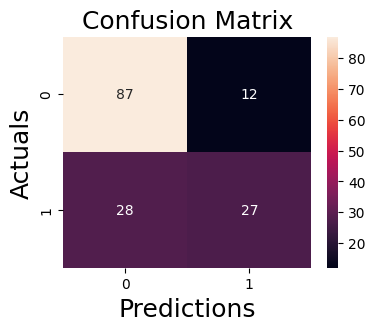

In [20]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

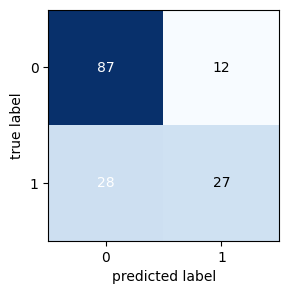

In [21]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize =(4,3))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        99
           1       0.69      0.49      0.57        55

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



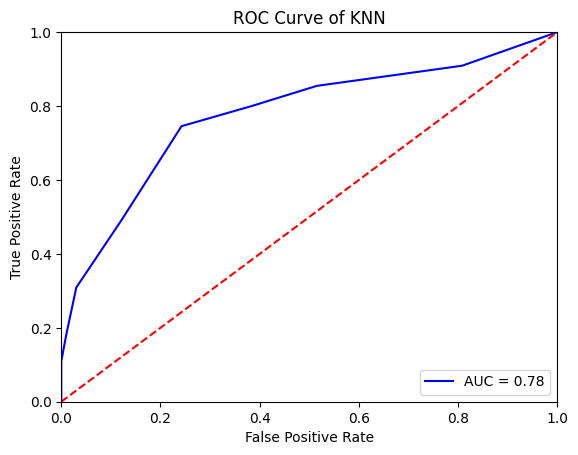

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn_clf.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

### GridSearchCV with Pipeline and ROC/AUC

In [24]:
df = pd.read_csv('/content/wisc_bc_data.csv')

In [25]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [26]:
x = df.iloc[:,2:].values
y = df['diagnosis'].values

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score

In [31]:
x_t, x_test, y_t, y_test = train_test_split(x, y, test_size=.20, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size=.20, random_state=1)

Implement Pipeline

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [33]:
pipe_lr = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components=2)),
     ('svc', SVC())])

pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svc', SVC())])

In [34]:
print('Test Accurary: %.3f' % pipe_lr.score(x_test, y_test))

Test Accurary: 0.965


Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [36]:
pipe_svc = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])

In [37]:
param_grid = {'pca__n_components':[14,15], 'svc__C':[0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'svc__kernel':['poly', 'rbf', 'sigmoid', 'linear', 'precomputed']}

In [38]:
grid = GridSearchCV(pipe_svc, param_grid = param_grid, cv = 5)

In [39]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [14, 15],
                         'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['poly', 'rbf', 'sigmoid', 'linear',
                                         'precomputed']})

In [40]:
print("Best cross-validation accuracy : {:.2f}". format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Validation set accuracy : {:.2f}". format(grid.score(x_val, y_val)))

Best cross-validation accuracy : 0.99
Best parameters:  {'pca__n_components': 14, 'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
Validation set accuracy : 0.97


In [41]:
pipe_svc = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components=14)),
    ('svc', SVC(C=0.1, gamma = 0.001, kernel = 'linear', probability=True ))
])

pipe_svc.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=14)),
                ('svc',
                 SVC(C=0.1, gamma=0.001, kernel='linear', probability=True))])

In [42]:
print('Accuracy: %.3f' % pipe_svc.score(x_test, y_test))

Accuracy: 0.956


In [43]:
y_pred = pipe_lr.predict(x_test)

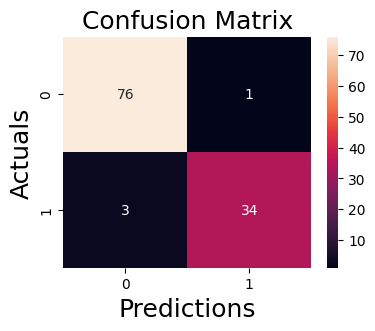

In [44]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        77
           1       0.97      0.92      0.94        37

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



ROC/AUC Curve

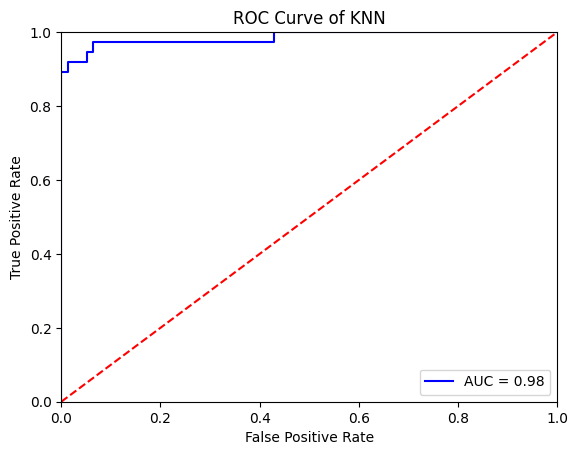

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = pipe_svc.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()